In [1]:
from os.path import join
import torch
DATA_PATH = '/projects/b1042/GoyalLab/jaekj/SCTAB_FINAL/Embedding'

test_emb = torch.load(join(DATA_PATH, "test_embedding.pt"), weights_only=True)

X_test_emb = test_emb["X"]
y_test = test_emb["y_true"]

In [2]:
import numpy as np
unique_test_labels = torch.unique(y_test)
y_test_numpy = y_test.cpu().numpy()

total_idx_per_class = []
for class_idx in range(164):
    print(f"[INFO] Count the total number of cells in class {class_idx}...")
    true_label = unique_test_labels[class_idx].item()
    class_idxs = np.where(y_test_numpy == true_label)[0]
    z0_obs = X_test_emb[class_idxs]  # use all points for that class
    total_idx_per_class.append(len(z0_obs))

[INFO] Count the total number of cells in class 0...
[INFO] Count the total number of cells in class 1...
[INFO] Count the total number of cells in class 2...
[INFO] Count the total number of cells in class 3...
[INFO] Count the total number of cells in class 4...
[INFO] Count the total number of cells in class 5...
[INFO] Count the total number of cells in class 6...
[INFO] Count the total number of cells in class 7...
[INFO] Count the total number of cells in class 8...
[INFO] Count the total number of cells in class 9...
[INFO] Count the total number of cells in class 10...
[INFO] Count the total number of cells in class 11...
[INFO] Count the total number of cells in class 12...
[INFO] Count the total number of cells in class 13...
[INFO] Count the total number of cells in class 14...
[INFO] Count the total number of cells in class 15...
[INFO] Count the total number of cells in class 16...
[INFO] Count the total number of cells in class 17...
[INFO] Count the total number of cells

In [3]:
import pandas as pd
df = pd.DataFrame(total_idx_per_class, columns=["Counts"])
print(df[0:10])
print(df.min())
print(df.max())

   Counts
0  156566
1    4155
2    8611
3   53049
4   34856
5    1240
6    5495
7   43004
8   10002
9   16651
Counts    146
dtype: int64
Counts    344083
dtype: int64


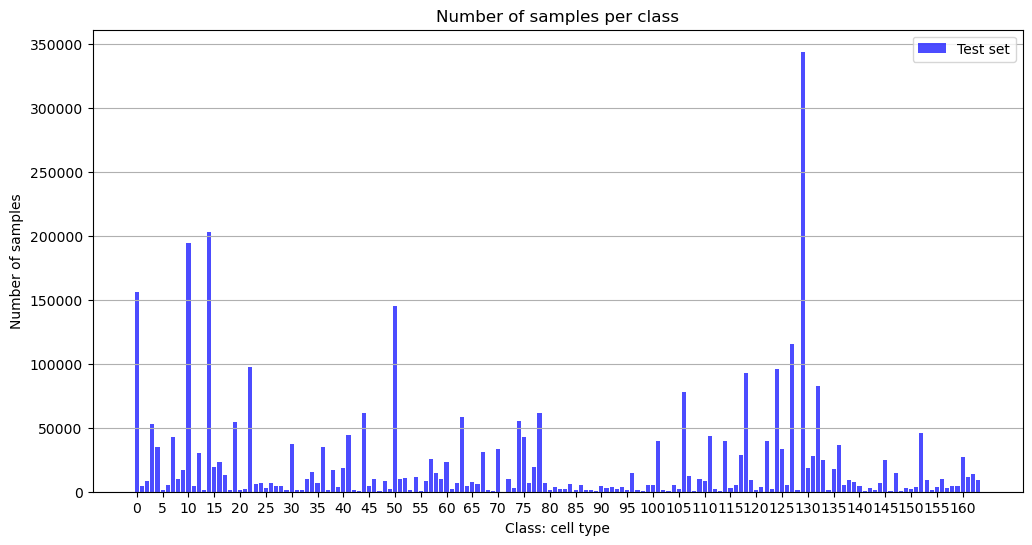

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(range(164), total_idx_per_class, label="Test set", color='blue', alpha=0.7)
plt.title("Number of samples per class")
plt.xlabel("Class: cell type")
plt.ylabel("Number of samples")
plt.xticks(range(0, 164, 5))
plt.grid(axis='y')
plt.legend()
plt.show()

In [5]:
z0_obs

tensor([[0.0000, 0.0000, 0.0597,  ..., 0.0000, 1.8325, 1.6349],
        [0.0000, 0.0000, 1.3992,  ..., 0.0686, 1.5700, 0.3246],
        [0.4469, 0.0000, 1.8789,  ..., 0.0000, 1.5784, 1.0889],
        ...,
        [0.0000, 0.0000, 1.4337,  ..., 0.0000, 0.9532, 0.9116],
        [0.0000, 0.0000, 0.9424,  ..., 0.0000, 1.5084, 0.8508],
        [0.0000, 0.0000, 0.8352,  ..., 0.0000, 1.5545, 0.7869]])

: 